1.2745083887453066
0.3115703410217154
0.7039057376630612


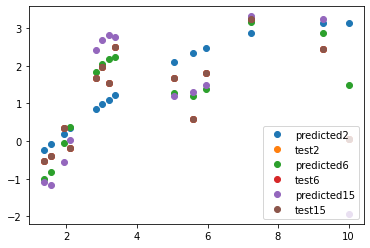

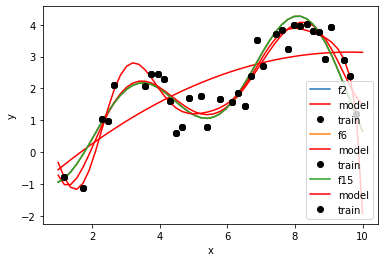

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
 
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
for deg in [2, 6, 15]:
    
    poly = PolynomialFeatures(degree=deg)
    xnew = poly.fit_transform(x)
    
    np.random.seed(12)
    indeksi = np.random.permutation(len(xnew))
    indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
    indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

    xtrain = xnew[indeksi_train,]
    ytrain = y_measured[indeksi_train]
    
    xtest = xnew[indeksi_test,]
    ytest = y_measured[indeksi_test]

    linearModel = lm.LinearRegression()
    linearModel.fit(xtrain,ytrain)

    ytest_p = linearModel.predict(xtest)

    plt.figure(1)
    plt.plot(xtest[:,1],ytest_p,'o',label='predicted'+str(deg))
    plt.plot(xtest[:,1],ytest,'o',label='test'+str(deg))
    plt.legend(loc = 4)

    #pozadinska funkcija vs model
    plt.figure(2)
    plt.plot(x,y_true,label='f'+str(deg))
    plt.plot(x, linearModel.predict(xnew),'r-',label='model')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(xtrain[:,1],ytrain,'ok',label='train')
    plt.legend(loc = 4)
    
    MSE_test = mean_squared_error(ytest, ytest_p)
    print(MSE_test)
plt.show()
